In [4]:
import pandas as pd
import numpy as np
import glob as glob

In [6]:
csv_data_path = 'dtu_data/'
csvfiles = glob.glob(csv_data_path + '*.csv')
print(csvfiles)
df = pd.DataFrame()
all_data = pd.DataFrame()

len(csvfiles)

['dtu_data\\fuelDensity.csv', 'dtu_data\\fuelTemp.csv', 'dtu_data\\fuelVolumeFlowRate.csv', 'dtu_data\\inclinometer-raw.csv', 'dtu_data\\speedKnots.csv', 'dtu_data\\starboardPitch.csv', 'dtu_data\\starboardRudder.csv', 'dtu_data\\windAngle.csv', 'dtu_data\\windSpeed.csv']


9

In [189]:
df = pd.DataFrame()
for i in range(len(csvfiles)):
    print('Processing: '+str(csvfiles[i].split('/')[-1].split('.')[0]))
    if not 'tude' in csvfiles[i]:
        df = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')
        print('Converting datetime')
        df.index = pd.to_datetime((df.index-634018095139168000)/1e7,unit='s',origin='2010-02-16')
        print('Converting datetime, done ...')
        #df.index = pd.to_datetime(df.index)
        df[df.columns[0]] = pd.to_numeric(df[df.columns[0]]) 
        df.index.names = ['Date']
        df = df.rename(columns={ df.columns[0]: csvfiles[i].split('/')[-1].split('.')[0] })
        #df[csvfiles[i]] = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')
        all_data = all_data.append(df,sort=True)
        all_data = all_data.resample('1min').mean()
        #df=df.resample('1s').mean()
        # Clean up memory
        del df
        print(str(i+1) + ' done of ' + str(len(csvfiles)))
    #df = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')


print('All done!')

Processing: dtu_data\fuelDensity
Converting datetime
Converting datetime, done ...
1 done of 9
Processing: dtu_data\fuelTemp
Converting datetime
Converting datetime, done ...
2 done of 9
Processing: dtu_data\fuelVolumeFlowRate
Converting datetime
Converting datetime, done ...
3 done of 9
Processing: dtu_data\inclinometer-raw
Converting datetime
Converting datetime, done ...
4 done of 9
Processing: dtu_data\speedKnots
Converting datetime
Converting datetime, done ...
5 done of 9
Processing: dtu_data\starboardPitch
Converting datetime
Converting datetime, done ...
6 done of 9
Processing: dtu_data\starboardRudder
Converting datetime
Converting datetime, done ...
7 done of 9
Processing: dtu_data\windAngle
Converting datetime
Converting datetime, done ...
8 done of 9
Processing: dtu_data\windSpeed
Converting datetime
Converting datetime, done ...
9 done of 9
All done!


In [9]:
all_data.dropna()

,dtu_data\fuelDensity,dtu_data\fuelTemp,dtu_data\fuelVolumeFlowRate,dtu_data\inclinometer-raw,dtu_data\speedKnots,dtu_data\starboardPitch,dtu_data\starboardRudder,dtu_data\windAngle,dtu_data\windSpeed
Date,,,,,,,,,
2010-02-17 07:03:00,0.934025,90.419065,0.372824,357.440403,1.682258,2.564000,2.414050,260.700000,15.823333
2010-02-17 07:04:00,0.931635,92.398794,0.430857,357.857317,6.953333,5.764500,-1.215100,226.266667,14.970000
2010-02-17 07:05:00,0.933324,91.742111,0.412590,357.490806,11.632258,6.339667,1.264183,240.600000,12.686667
2010-02-17 07:06:00,0.935355,89.333152,0.488651,357.372258,13.283607,7.169367,0.523333,293.400000,21.266667
2010-02-17 07:07:00,0.932336,90.872902,0.478884,357.233821,15.614516,7.538550,-0.264900,310.066667,24.506667
...,...,...,...,...,...,...,...,...,...
2010-04-13 16:36:00,0.929180,97.281418,0.417196,357.257391,1.669643,-6.051400,-0.018709,15.892857,2.900000
2010-04-13 16:37:00,0.929383,97.263808,0.329081,357.257573,2.188889,-4.352431,1.701765,329.480000,0.896000
2010-04-13 16:38:00,0.929587,97.210036,0.284063,357.353629,2.863333,-1.608067,8.515100,303.300000,0.523333


In [10]:
all_data = all_data.dropna()

In [42]:
all_data.describe()

,dtu_data\fuelDensity,dtu_data\fuelTemp,dtu_data\fuelVolumeFlowRate,dtu_data\inclinometer-raw,dtu_data\speedKnots,dtu_data\starboardPitch,dtu_data\starboardRudder,dtu_data\windAngle,dtu_data\windSpeed
count,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000
mean,0.926742,97.495162,0.585865,357.258274,17.790143,7.302772,0.190599,165.475000,13.873588
std,0.002549,2.018294,0.118143,0.145314,5.289917,2.757480,1.755135,135.502653,7.204126
min,0.922152,14.380964,0.000000,351.826048,0.200000,-8.109757,-8.177967,0.000000,0.000000
25%,0.925171,96.804502,0.592833,357.206935,18.300000,8.011800,-0.099567,25.733333,8.063333
50%,0.925896,97.832696,0.629456,357.250000,19.476667,8.258717,-0.041627,157.900000,13.386667
75%,0.927322,98.544494,0.647996,357.296016,20.443548,8.410400,0.016550,311.333333,19.143333
max,0.985009,103.831503,0.720782,358.117016,24.853968,8.904783,8.622900,357.366667,36.830000


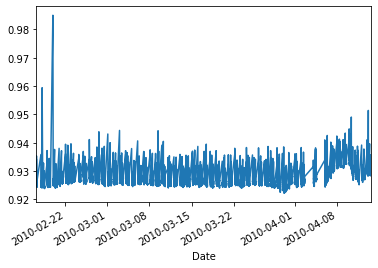

In [43]:
all_data[features[1]].plot()

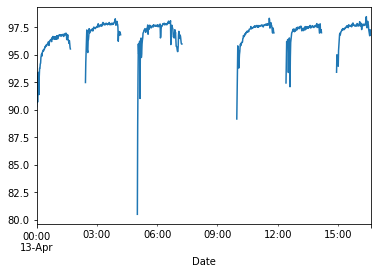

In [191]:
all_data[features[1]]['2010-04-13'].plot()

In [45]:
features = list(all_data)

In [168]:
features

['dtu_data\\fuelDensity',
 'dtu_data\\fuelTemp',
 'dtu_data\\fuelVolumeFlowRate',
 'dtu_data\\inclinometer-raw',
 'dtu_data\\speedKnots',
 'dtu_data\\starboardPitch',
 'dtu_data\\starboardRudder',
 'dtu_data\\windAngle',
 'dtu_data\\windSpeed']

In [169]:
label = features[4]

In [170]:
test_features = [features[2],
                 features[3],
                 features[1]]

In [171]:
all_data_train = pd.DataFrame()

for n_ in test_features:
    all_data_train[n_] = all_data[n_]

In [172]:
all_data_train.dropna()

,dtu_data\fuelVolumeFlowRate,dtu_data\inclinometer-raw,dtu_data\fuelTemp
Date,,,
2010-02-17 07:03:00,0.372824,357.440403,90.419065
2010-02-17 07:04:00,0.430857,357.857317,92.398794
2010-02-17 07:05:00,0.412590,357.490806,91.742111
2010-02-17 07:06:00,0.488651,357.372258,89.333152
2010-02-17 07:07:00,0.478884,357.233821,90.872902
...,...,...,...
2010-04-13 16:36:00,0.417196,357.257391,97.281418
2010-04-13 16:37:00,0.329081,357.257573,97.263808
2010-04-13 16:38:00,0.284063,357.353629,97.210036


In [173]:
X = np.array(all_data_train)
y = np.array(all_data[label])

In [174]:
X

array([[3.72824037e-01, 3.57440403e+02, 9.04190653e+01],
       [4.30857131e-01, 3.57857317e+02, 9.23987938e+01],
       [4.12589580e-01, 3.57490806e+02, 9.17421112e+01],
       ...,
       [2.84063015e-01, 3.57353629e+02, 9.72100363e+01],
       [2.33787845e-01, 3.57351855e+02, 9.68077933e+01],
       [2.28445933e-01, 3.57310000e+02, 9.67647967e+01]])

In [175]:
y

array([ 1.68225806,  6.95333333, 11.63225806, ...,  2.86333333,
        0.97704918,  0.46666667])

In [176]:

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [178]:
cores = -1 # use all cores

m_linear = sk.linear_model.LinearRegression()

In [179]:
m_linear.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_linear.predict(X_test),y_test)

print('Linear R2 train:', R2_train)

Linear R2 train: 0.5996726930153897


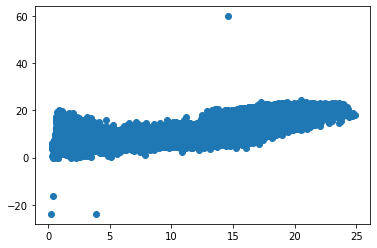

In [180]:
plt.scatter(y,m_linear.predict(X))

Linear R2 train: 0.5996726930153897


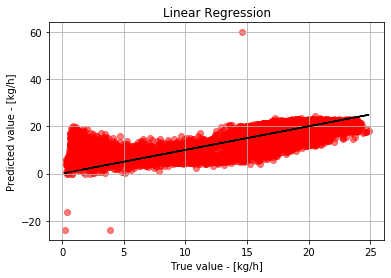

In [181]:
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train)

R2_train = r2_score(m_linear.predict(X_test),y_test)
print('Linear R2 train:', R2_train)

plt.scatter(y,m_linear.predict(X),marker='o',alpha=0.5,color='r')

plt.plot(y,y,color='black')

plt.title('Linear Regression')
plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

R2 train random forest full data set: 0.9284155945174786


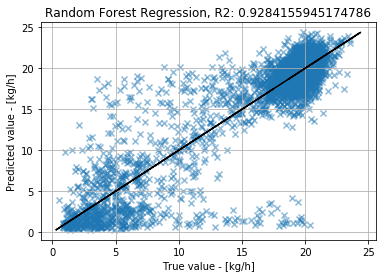

In [182]:
from sklearn.ensemble import RandomForestRegressor
m_rf = RandomForestRegressor(max_depth=50, random_state=42,n_estimators=300)
m_rf.fit(X_train, y_train)

R2_train = r2_score(m_rf.predict(X),y)
print('R2 train random forest full data set:', R2_train)

plt.scatter(m_rf.predict(X_test),y_test,marker='x',alpha=0.5)
plt.plot(y_test,y_test,color='black')
plt.title('Random Forest Regression, R2: ' + str(R2_train))

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

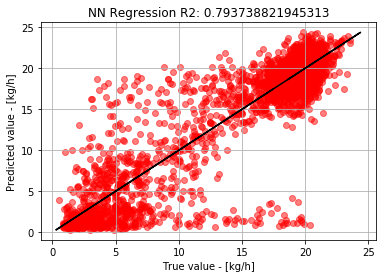

In [183]:
from sklearn.neural_network import MLPRegressor
m_NN = MLPRegressor(hidden_layer_sizes=100, activation='relu',alpha=0.0001)
m_NN.fit(X_train, y_train)

R2_train = r2_score(m_rf.predict(X_test),y_test)

plt.scatter(m_rf.predict(X_test),y_test,marker='o',alpha=0.5,color='b')
plt.plot(y_test,y_test,color='black')
plt.title('NN Regression R2: ' + str(R2_train))

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

In [197]:
all_data_models['lin_regr'] = m_linear.predict(X)

In [198]:
all_data_models['randomf'] = m_rf.predict(X)

In [186]:
all_data_models

,dtu_data\fuelDensity,dtu_data\fuelTemp,dtu_data\fuelVolumeFlowRate,dtu_data\inclinometer-raw,dtu_data\speedKnots,dtu_data\starboardPitch,dtu_data\starboardRudder,dtu_data\windAngle,dtu_data\windSpeed,lin_regr,randomf
Date,,,,,,,,,,,
2010-02-17 07:03:00,0.934025,90.419065,0.372824,357.440403,1.682258,2.564000,2.414050,260.700000,15.823333,7.131086,2.089210
2010-02-17 07:04:00,0.931635,92.398794,0.430857,357.857317,6.953333,5.764500,-1.215100,226.266667,14.970000,6.427898,6.765505
2010-02-17 07:05:00,0.933324,91.742111,0.412590,357.490806,11.632258,6.339667,1.264183,240.600000,12.686667,8.467458,9.323332
2010-02-17 07:06:00,0.935355,89.333152,0.488651,357.372258,13.283607,7.169367,0.523333,293.400000,21.266667,11.443844,8.413957
2010-02-17 07:07:00,0.932336,90.872902,0.478884,357.233821,15.614516,7.538550,-0.264900,310.066667,24.506667,12.565711,11.997268
...,...,...,...,...,...,...,...,...,...,...,...
2010-04-13 16:36:00,0.929180,97.281418,0.417196,357.257391,1.669643,-6.051400,-0.018709,15.892857,2.900000,11.841387,3.289977
2010-04-13 16:37:00,0.929383,97.263808,0.329081,357.257573,2.188889,-4.352431,1.701765,329.480000,0.896000,8.748279,2.967950
2010-04-13 16:38:00,0.929587,97.210036,0.284063,357.353629,2.863333,-1.608067,8.515100,303.300000,0.523333,6.411635,3.386931


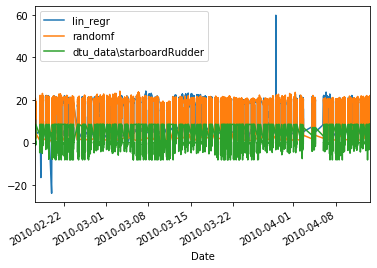

In [187]:
all_data_models[['lin_regr','randomf',features[6]]].plot()

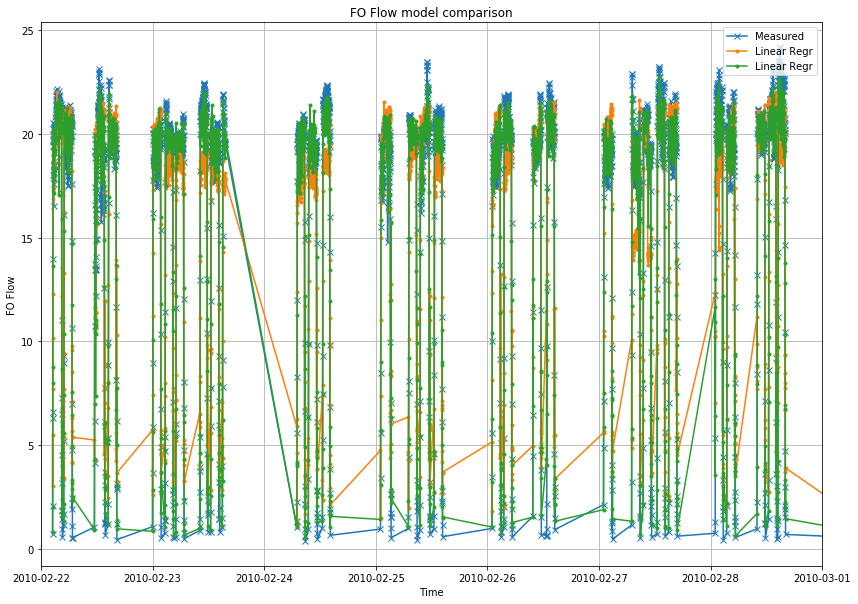

In [196]:
date1='2010-02-22'
date2='2010-03-01'

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(all_data_models[label][date1:date2],marker='x',label='Measured')
plt.plot(all_data_models['lin_regr'][date1:date2],marker='.',label='Linear Regr')
plt.plot(all_data_models['randomf'][date1:date2],marker='.',label='Linear Regr')


ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()